# Gold Price Prediction Project Introduction

Welcome to the Gold Price Prediction project! 📈

In this project, we embark on an exciting journey into the world of data analysis and machine learning to predict gold prices. Gold, a valuable and sought-after commodity, holds immense significance in the financial market. Accurate predictions of its prices have far-reaching implications for investors, financial institutions, and the global economy.

Our project unfolds in several key phases:

**Data Exploration**:
We begin by loading and exploring a comprehensive dataset containing historical gold price data. Through data examination, statistical inference, and correlation analysis, we aim to uncover hidden patterns and relationships within the data.

**Machine Learning Model**:
To predict gold prices, we harness the power of machine learning. Specifically, we employ a Random Forest Regressor, a robust algorithm known for its predictive capabilities. This model is trained on historical data and evaluated for its accuracy in forecasting future gold prices.

**Error Analysis**:
Model performance is assessed using industry-standard metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics provide insights into the accuracy and reliability of our predictions.

**Result Visualization**:
Visualizing the accuracy of our predicted results allows us to gain a clearer understanding of how well our model performs. Actual vs. predicted comparisons help us evaluate the model's real-world applicability.

Join us on this data-driven journey as we explore, analyze, and predict gold prices using advanced machine learning techniques. This project showcases the fusion of data science and finance, emphasizing the power of data-driven decision-making in the financial world.

Stay tuned for insights, discoveries, and accurate predictions that can shape investment strategies and financial decisions. Let's embark on this exciting adventure together!


In [22]:
df = pd.read_csv('gld_price_data.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


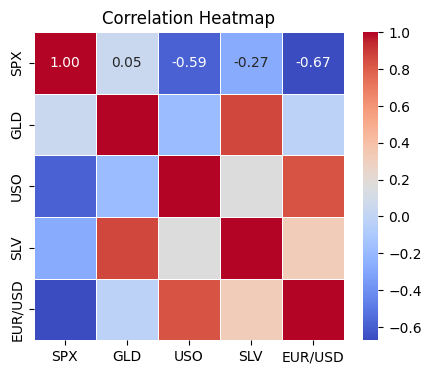

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [26]:
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



C:\Users\medoh\AppData\Local\Temp\ipykernel_19360\201541484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'blue')
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.p

Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


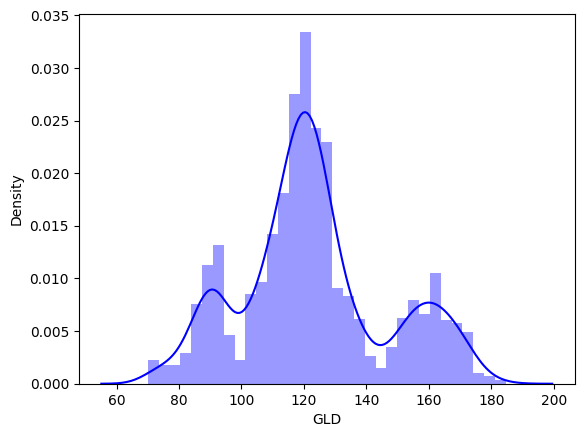

In [27]:
sns.distplot(df['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

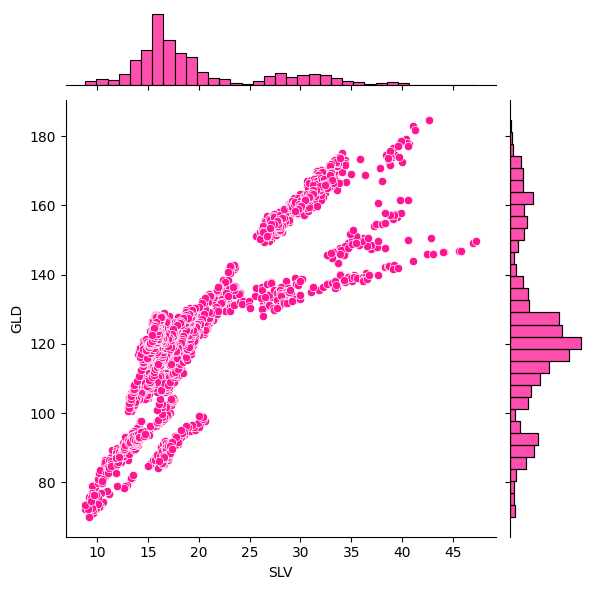

In [28]:
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

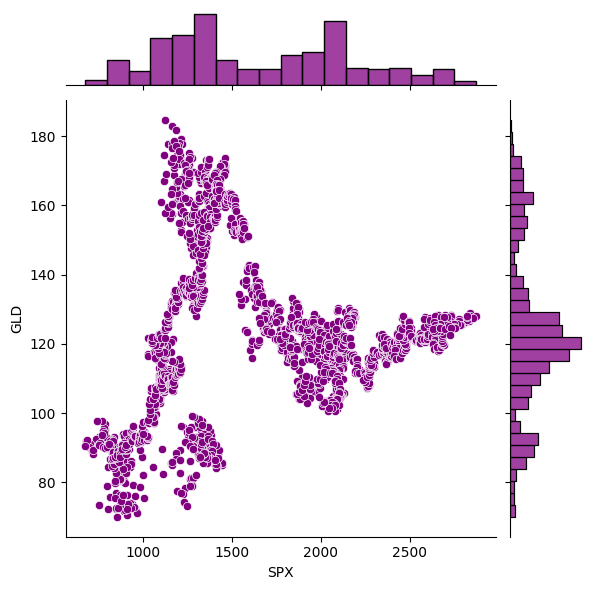

In [29]:
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

In [30]:
x_trail = df[['SPX','USO','SLV','EUR/USD']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = regressor.predict(x_test)

In [34]:
from sklearn import metrics

print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.297793151724892
MSE :   5.16257387057774
RMAE :   2.272129809358994


In [35]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9984324726699736
0.9899648553789232


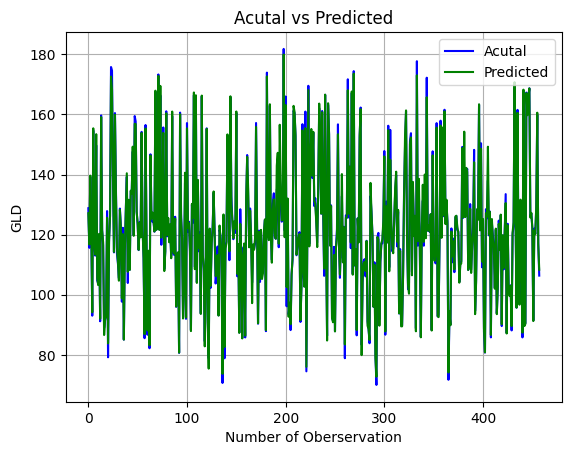

In [40]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'green', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

# Conclusion

In this project, we embarked on a journey to predict gold prices using machine learning techniques. Here are the key takeaways and findings:

**Data Exploration**:
We started by loading the dataset and conducting a preliminary examination. Fortunately, no missing values were found.

**Statistical Inference**:
Further exploration involved statistical inference to understand underlying trends and patterns in the data.

**Correlation Analysis**:
We visualized the relationships between variables using a correlation matrix and heatmap, providing insights into interdependencies.

**Target Variable Analysis**:
An analysis of the target variable, GLD, revealed its distribution characteristics, including skewness and kurtosis.

**Relationship Assessment**:
We examined relationships between GLD and other variables (SLV and SPX) through joint plots, gaining insights into potential associations.

**Machine Learning Model**:
To predict gold prices, we employed a Random Forest Regressor, which was trained and tested for predictive accuracy.

**Error Analysis**:
Model performance was assessed using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

**Accuracy Evaluation**:
The model's accuracy was evaluated on both training and test sets to ensure its readiness for real-world applications.

**Result Visualization**:
Finally, we visualized actual vs. predicted results to gain a clear understanding of the model's performance.

This project underscores the power of data analysis and machine learning in making predictions and extracting insights from financial data. Accurate gold price predictions have implications for investors and financial institutions alike.

Thank you for joining me on this data science journey. Stay tuned for more exciting projects!
